In [ ]:
from typing_extensions import TypedDict

class State(TypedDict):
    num_a:int
    num_b:int
    result:int  

In [2]:
def add_nums(state: State):
    final= state['num_a'] + state['num_b']
    return {"result":final}

def big_number(state: State):
    print(f"Final answer of the addition is a big number: {state['result']}")
    return {}

def small_number(state: State):
    print(f"The final answer of addition is a small number {state['result']}")
    return {}

In [3]:
from langgraph.graph import StateGraph, END, START
graph = StateGraph(State)

In [4]:
graph.add_node("addition node",add_nums)
graph.add_node("big print node",big_number)
graph.add_node("small print node",small_number)

In [5]:
graph.add_edge(START,"addition node")

In [ ]:
def print_by_size(state : State):
    if state['result']>10:
        return "big print node"
    else:
        return "small print node"
    
graph.add_conditional_edges("addition node",print_by_size)


In [7]:
graph.add_edge('big print node',END)
graph.add_edge('small print node', END)

In [12]:
app2 = graph.compile()

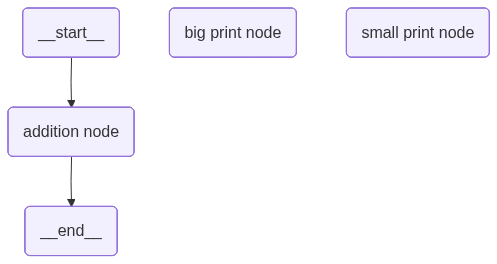

In [9]:
from IPython.display import Image, display

# Generate and display PNG
display(Image(app.get_graph().draw_mermaid_png()))

In [13]:
# After compiling, run this:
print("Test small number:")
result = app2.invoke({"num_a": 3, "num_b": 5, "result": 0})
print(f"Final state: {result}\n")

print("Test big number:")
result = app2.invoke({"num_a": 8, "num_b": 9, "result": 0})
print(f"Final state: {result}")

Test small number:
The final answer of addition is a small number 8
Final state: {'num_a': 3, 'num_b': 5, 'result': 8}

Test big number:
Final answer of the addition is a big number: 17
Final state: {'num_a': 8, 'num_b': 9, 'result': 17}


In [16]:
# Print the graph structure
print(app2.get_graph().nodes)
print(app2.get_graph().edges)

{'__start__': Node(id='__start__', name='__start__', data=RunnableCallable(tags=None, recurse=True, explode_args=False, func_accepts={}), metadata=None), 'addition node': Node(id='addition node', name='addition node', data=addition node(tags=None, recurse=True, explode_args=False, func_accepts={}), metadata=None), 'big print node': Node(id='big print node', name='big print node', data=big print node(tags=None, recurse=True, explode_args=False, func_accepts={}), metadata=None), 'small print node': Node(id='small print node', name='small print node', data=small print node(tags=None, recurse=True, explode_args=False, func_accepts={}), metadata=None), '__end__': Node(id='__end__', name='__end__', data=None, metadata=None)}
[Edge(source='__start__', target='addition node', data=None, conditional=False), Edge(source='addition node', target='__end__', data=None, conditional=False)]
